# Memuat Data Provinsi Kalimantan Tengah Pilpres 2019

In [1]:
import pandas as pd
import random
import numpy as np

data = pd.read_csv("D:/PENS/Semester 3/Analisa Statistika Terapan/pilpres_kalteng.csv", sep = ";")
data

,Provinsi,Kabupaten_Kota,Kecamatan,Kelurahan,Jokowi,Prabowo
0,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Batampang,469,424
1,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Batilap,328,113
2,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Damparan,685,770
3,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Kalanis,387,1197
4,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Lehai,168,661
...,...,...,...,...,...,...
1567,Kalimantan Tengah,Sukamara,Sukamara,Padang,2005,1512
1568,Kalimantan Tengah,Sukamara,Sukamara,Pangkalan Muntai,731,488
1569,Kalimantan Tengah,Sukamara,Sukamara,Petarikan,379,145
1570,Kalimantan Tengah,Sukamara,Sukamara,Pudu,426,135


# Pilih Kabupaten/Kota di Kalimantan Tengah dan Drop Kolom

In [2]:
data = data.drop(["Jokowi", "Prabowo"], axis=1)
kabupaten_barito_selatan = data[data["Kabupaten_Kota"] == "Barito Selatan"]
kabupaten_barito_timur = data[data["Kabupaten_Kota"] == "Barito Timur"]
kabupaten_barito_utara = data[data["Kabupaten_Kota"] == "Barito Utara"]
kabupaten_gunung_mas = data[data["Kabupaten_Kota"] == "Gunung Mas"]
kabupaten_kapuas = data[data["Kabupaten_Kota"] == "Kapuas"]
kabupaten_katingan = data[data["Kabupaten_Kota"] == "Katingan"]
kabupaten_kota_palangkaraya = data[data["Kabupaten_Kota"] == "Kota Palangkaraya"]
kabupaten_kotawaringin_barat = data[data["Kabupaten_Kota"] == "Kotawaringin Barat"]
kabupaten_kotawaringin_timur = data[data["Kabupaten_Kota"] == "Kotawaringin Timur"]
kabupaten_lamandau = data[data["Kabupaten_Kota"] == "Lamandau"]
kabupaten_murung_raya = data[data["Kabupaten_Kota"] == "Murung Raya"]
kabupaten_pulang_pisau = data[data["Kabupaten_Kota"] == "Pulang Pisau"]
kabupaten_seruyan = data[data["Kabupaten_Kota"] == "Seruyan"]
kabupaten_sukamara = data[data["Kabupaten_Kota"] == "Sukamara"]
kabupaten_barito_selatan

,Provinsi,Kabupaten_Kota,Kecamatan,Kelurahan
0,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Batampang
1,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Batilap
2,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Damparan
3,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Kalanis
4,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Lehai
...,...,...,...,...
88,Kalimantan Tengah,Barito Selatan,Karau Kuala,Salat Baru
89,Kalimantan Tengah,Barito Selatan,Karau Kuala,Talio
90,Kalimantan Tengah,Barito Selatan,Karau Kuala,Tampijak
91,Kalimantan Tengah,Barito Selatan,Karau Kuala,Teluk Betung


# Fungsi Generate Random Data

In [3]:
def generate_tps(data, suara1, suara2, golput):
    kelurahan = data["Kelurahan"].unique()
    kelurahan_tps = []
    for kel in kelurahan:
        kelurahan_tps.append({
            "kelurahan": kel,
            "jumlah_tps": random.randint(3, 7)
    })
    
    tps = []
    for kel in kelurahan_tps:
        for i in range(kel["jumlah_tps"]):
            tps.append({
                "kelurahan": kel["kelurahan"],
                "nomor_tps": i+1,
                "suara1": 0,
                "suara2": 0,
                "golput": 0
            })
            
    random_suara1 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * suara1).tolist()
    random_suara2 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * suara2).tolist()
    random_golput = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * golput).tolist()

    random_suara1 = [round(i) for i in random_suara1]
    random_suara2 = [round(i) for i in random_suara2]
    random_golput = [round(i) for i in random_golput]
    
    for i in range(len(tps)):
        tps[i]["suara1"] = random_suara1[i]
        tps[i]["suara2"] = random_suara2[i]
        tps[i]["golput"] = random_golput[i]
  
    tps.append({
        "kelurahan": "TOTAL",
        "nomor_tps": sum([kel["jumlah_tps"] for kel in kelurahan_tps]),
        "suara1": sum([t["suara1"] for t in tps]),
        "suara2": sum([t["suara2"] for t in tps]),
        "golput": sum([t["golput"] for t in tps])
    })
    
    return pd.DataFrame(tps)


In [4]:
# Generate Random Data Melalui Total Suara Provinsi
suara1 = 830_948
suara2 = 537_138
golput = 385_138
tps = generate_tps(data, suara1, suara2, golput)
tps

,kelurahan,nomor_tps,suara1,suara2,golput
0,Batampang,1,15,71,113
1,Batampang,2,105,74,33
2,Batampang,3,86,60,41
3,Batampang,4,175,6,34
4,Batampang,5,98,127,27
...,...,...,...,...,...
7718,Sukaraja,1,13,78,83
7719,Sukaraja,2,26,12,16
7720,Sukaraja,3,124,76,33
7721,Sukaraja,4,56,21,87


In [5]:
# Kabupaten Kota 1
suara1 = 44_110
suara2 = 33_370
golput = 17_512
tps_barito_selatan = generate_tps(kabupaten_barito_selatan, suara1, suara2, golput)
tps_barito_selatan

,kelurahan,nomor_tps,suara1,suara2,golput
0,Batampang,1,5,92,35
1,Batampang,2,1,14,84
2,Batampang,3,457,10,59
3,Batampang,4,65,48,21
4,Batilap,1,23,214,1
...,...,...,...,...,...
443,Teluk Sampudau,2,24,33,16
444,Teluk Sampudau,3,121,107,21
445,Teluk Sampudau,4,26,13,112
446,Teluk Sampudau,5,138,135,4


In [6]:
# Kabupaten Kota 2
suara1 = 43_148
suara2 = 23_950
golput = 9_383
tps_barito_timur = generate_tps(kabupaten_barito_timur, suara1, suara2, golput)
tps_barito_timur

,kelurahan,nomor_tps,suara1,suara2,golput
0,Ampari,1,34,8,45
1,Ampari,2,225,44,11
2,Ampari,3,16,31,7
3,Apar Batu,1,22,66,66
4,Apar Batu,2,9,11,2
...,...,...,...,...,...
500,Unsum,1,180,94,18
501,Unsum,2,27,38,18
502,Unsum,3,9,138,15
503,Unsum,4,89,36,4


In [7]:
# Kabupaten Kota 3
suara1 = 46_161
suara2 = 31_436
golput = 25_777
tps_barito_utara = generate_tps(kabupaten_barito_utara, suara1, suara2, golput)
tps_barito_utara

,kelurahan,nomor_tps,suara1,suara2,golput
0,Baok,1,172,38,146
1,Baok,2,3,39,17
2,Baok,3,67,97,5
3,Baok,4,209,44,13
4,Baok,5,50,100,8
...,...,...,...,...,...
557,Sei Liju,4,57,11,69
558,Sei Liju,5,105,80,16
559,Sei Liju,6,7,60,97
560,Sei Liju,7,12,6,11


In [8]:
# Kabupaten Kota 4
suara1 = 54_247
suara2 = 9_110
golput = 17_367
tps_gunung_mas = generate_tps(kabupaten_gunung_mas, suara1, suara2, golput)
tps_gunung_mas

,kelurahan,nomor_tps,suara1,suara2,golput
0,Keretau Rambangun,1,169,16,35
1,Keretau Rambangun,2,21,5,17
2,Keretau Rambangun,3,204,3,35
3,Keretau Rambangun,4,27,17,13
4,Keretau Rambangun,5,20,16,45
...,...,...,...,...,...
629,Upon Batu,1,82,13,3
630,Upon Batu,2,192,46,14
631,Upon Batu,3,80,25,6
632,Upon Batu,4,68,24,24


In [9]:
# Kabupaten Kota 5
suara1 = 94_911
suara2 = 99_107
golput = 67_911
tps_kapuas = generate_tps(kabupaten_kapuas, suara1, suara2, golput)
tps_kapuas

,kelurahan,nomor_tps,suara1,suara2,golput
0,Basarang,1,12,24,21
1,Basarang,2,12,288,2
2,Basarang,3,55,160,166
3,Basarang,4,31,53,67
4,Basarang,5,49,201,142
...,...,...,...,...,...
1103,Tumbang Randang,3,126,133,18
1104,Tumbang Randang,4,50,150,55
1105,Tumbang Randang,5,13,22,39
1106,Tumbang Randang,6,71,22,13


In [10]:
# Kabupaten Kota 6
suara1 = 66_828
suara2 = 21_284
golput = 25_155
tps_katingan = generate_tps(kabupaten_katingan, suara1, suara2, golput)
tps_katingan

,kelurahan,nomor_tps,suara1,suara2,golput
0,Penda Nange,1,24,46,20
1,Penda Nange,2,253,7,89
2,Penda Nange,3,105,15,70
3,Penda Nange,4,14,33,63
4,Rangan Bahekang,1,31,13,43
...,...,...,...,...,...
785,Tewang Rangkang,4,53,11,162
786,Tumbang Tarusan,1,294,7,147
787,Tumbang Tarusan,2,84,48,43
788,Tumbang Tarusan,3,32,34,15


In [11]:
# Kabupaten Kota 7
suara1 = 89_027
suara2 = 61_001
golput = 31_874
tps_kota_palangkaraya = generate_tps(kabupaten_kota_palangkaraya, suara1, suara2, golput)
tps_kota_palangkaraya

,kelurahan,nomor_tps,suara1,suara2,golput
0,Banturung,1,1697,523,60
1,Banturung,2,999,65,286
2,Banturung,3,704,1040,438
3,Habaring Hurung,1,561,8,393
4,Habaring Hurung,2,122,1110,73
...,...,...,...,...,...
143,Kereng Bangkirai,4,44,710,654
144,Sabaru,1,79,345,12
145,Sabaru,2,1294,572,184
146,Sabaru,3,1125,310,73


In [12]:
# Kabupaten Kota 8
suara1 = 79_626
suara2 = 61_568
golput = 37_861
tps_kotawaringin_barat = generate_tps(kabupaten_kotawaringin_barat, suara1, suara2, golput)
tps_kotawaringin_barat

,kelurahan,nomor_tps,suara1,suara2,golput
0,Baru,1,291,106,194
1,Baru,2,532,383,31
2,Baru,3,57,25,163
3,Baru,4,12,56,14
4,Kenambui,1,115,141,217
...,...,...,...,...,...
461,Sungai Rangit Jaya,3,368,101,143
462,Sungai Rangit Jaya,4,107,176,13
463,Sungai Rangit Jaya,5,426,557,183
464,Sungai Rangit Jaya,6,172,72,34


In [13]:
# Kabupaten Kota 9
suara1 = 114_364
suara2 = 93_859
golput = 65_966
tps_kotawaringin_timur = generate_tps(kabupaten_kotawaringin_timur, suara1, suara2, golput)
tps_kotawaringin_timur

,kelurahan,nomor_tps,suara1,suara2,golput
0,Bakti Karya,1,60,23,228
1,Bakti Karya,2,215,75,98
2,Bakti Karya,3,196,91,101
3,Bakti Karya,4,75,220,202
4,Buntut Nusa,1,22,136,84
...,...,...,...,...,...
927,Wonosari,4,136,53,83
928,Wonosari,5,231,56,191
929,Wonosari,6,216,15,95
930,Wonosari,7,5,19,111


In [14]:
# Kabupaten Kota 10
suara1 = 38_155
suara2 = 10_606
golput = 17_614
tps_lamandau = generate_tps(kabupaten_lamandau, suara1, suara2, golput)
tps_lamandau

,kelurahan,nomor_tps,suara1,suara2,golput
0,Batu Tambun,1,36,116,7
1,Batu Tambun,2,90,34,68
2,Batu Tambun,3,29,19,31
3,Batu Tambun,4,13,2,79
4,Batu Tambun,5,20,13,55
...,...,...,...,...,...
439,Wonorejo,1,170,13,37
440,Wonorejo,2,8,22,1
441,Wonorejo,3,23,60,23
442,Wonorejo,4,60,5,47


In [15]:
# Kabupaten Kota 11
suara1 = 33_526
suara2 = 29_949
golput = 13_272
tps_murung_raya = generate_tps(kabupaten_murung_raya, suara1, suara2, golput)
tps_murung_raya

,kelurahan,nomor_tps,suara1,suara2,golput
0,Batu Tojah,1,10,2,46
1,Batu Tojah,2,57,45,7
2,Batu Tojah,3,67,23,3
3,Batu Tojah,4,61,8,18
4,Batu Tojah,5,12,30,19
...,...,...,...,...,...
628,Tumbang Tujang,2,153,102,16
629,Tumbang Tujang,3,52,45,6
630,Tumbang Tujang,4,22,57,1
631,Tumbang Tujang,5,60,47,55


In [16]:
# Kabupaten Kota 12
suara1 = 50_047
suara2 = 26_092
golput = 18_851
tps_pulang_pisau = generate_tps(kabupaten_pulang_pisau, suara1, suara2, golput)
tps_pulang_pisau

,kelurahan,nomor_tps,suara1,suara2,golput
0,Bawan,1,12,33,151
1,Bawan,2,109,128,44
2,Bawan,3,77,196,6
3,Goha,1,91,108,9
4,Goha,2,3,5,69
...,...,...,...,...,...
469,Sei Hambawang,2,49,113,101
470,Sei Hambawang,3,256,16,24
471,Sei Hambawang,4,107,40,22
472,Sei Hambawang,5,25,56,25


In [17]:
# Kabupaten Kota 13
suara1 = 54_672
suara2 = 24_577
golput = 31_161
tps_seruyan = generate_tps(kabupaten_seruyan, suara1, suara2, golput)
tps_seruyan

,kelurahan,nomor_tps,suara1,suara2,golput
0,Batu Menangis,1,34,27,94
1,Batu Menangis,2,74,64,30
2,Batu Menangis,3,25,197,89
3,Batu Menangis,4,86,18,22
4,Batu Menangis,5,103,12,8
...,...,...,...,...,...
478,Tumbang Setoli,3,364,0,62
479,Tumbang Setoli,4,5,40,83
480,Tumbang Setoli,5,207,20,37
481,Tumbang Setoli,6,57,134,151


In [18]:
# Kabupaten Kota 14
suara1 = 22_126
suara2 = 11_229
golput = 5_434
tps_sukamara = generate_tps(kabupaten_sukamara, suara1, suara2, golput)
tps_sukamara

,kelurahan,nomor_tps,suara1,suara2,golput
0,Air Dua,1,146,157,45
1,Air Dua,2,25,28,60
2,Air Dua,3,113,95,71
3,Air Dua,4,19,81,27
4,Balai Riam,1,19,137,23
...,...,...,...,...,...
152,Pudu,6,46,37,83
153,Sukaraja,1,435,43,11
154,Sukaraja,2,273,2,127
155,Sukaraja,3,125,126,136


# Estimasi Parameter dengan Random Sampling

In [19]:
# Estimasi Parameter with Random Sampling
estimation_parameter_data = []

for i in range(1, 20):  
    random_sampling = tps.sample(frac=i/20, random_state=42).reset_index(drop=True)
    
    # Sum all suara_1, suara_2, and golput
    suara1 = random_sampling["suara1"].sum()
    suara2 = random_sampling["suara2"].sum()
    golput = random_sampling["golput"].sum()
    
    
    # Calculate percentage of suara_1, suara_2, and golput
    percentage_suara1 = (suara1 / (suara1 + suara2 + golput)) * 100
    percentage_suara2 = (suara2 / (suara1 + suara2 + golput)) * 100
    percentage_golput = (golput / (suara1 + suara2 + golput)) * 100
    
    estimation_parameter_data.append({
        "Sample (%)": int(i/20 * 100),
        "suara1": percentage_suara1,
        "suara2": percentage_suara2,
        "golput": percentage_golput,
  })

# Make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("Estimasi Proporsi Parameter".center(40, "="))
estimation_parameter_data

======Estimasi Proporsi Parameter=======


,Sample (%),suara1,suara2,golput
0,5,48.442278,30.676201,20.881521
1,10,46.599139,31.836424,21.564437
2,15,46.755590,31.505713,21.738696
3,20,46.238846,31.988325,21.772830
4,25,47.277412,30.815617,21.906971
5,30,47.208946,30.909452,21.881602
6,35,47.216088,30.911207,21.872705
7,40,47.287278,30.901176,21.811545
8,45,47.313195,30.858954,21.827852
9,50,47.307255,30.850705,21.842040


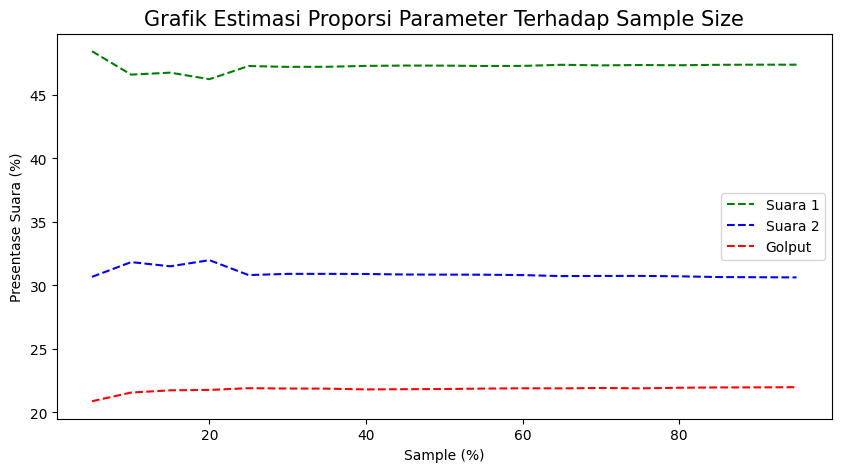

In [20]:
# Grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimation_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Presentase Suara (%)")
plt.legend()
plt.show()

In [21]:
# Hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara1 = (tps["suara1"].sum() / (tps["suara1"].sum() + tps["suara2"].sum() + tps["golput"].sum())) * 100  
percentage_suara2 = (tps["suara2"].sum() / (tps["suara1"].sum() + tps["suara2"].sum() + tps["golput"].sum())) * 100
percentage_golput = (tps["golput"].sum() / (tps["suara1"].sum() + tps["suara2"].sum() + tps["golput"].sum())) * 100

x = estimation_parameter_data["Sample (%)"]
error_suara1 = abs(100*(estimation_parameter_data["suara1"]-percentage_suara1)/percentage_suara1)
error_suara2 = abs(100*(estimation_parameter_data["suara2"]-percentage_suara2)/percentage_suara2)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput)/percentage_golput)

data_error = pd.DataFrame({
    "Sample (%)": x,
    "Error Suara 1": error_suara1,
    "Error Suara 2": error_suara2,
    "Error Golput": error_golput
})

print("Error Estimasi Proporsi Parameter".center(50, "="))
data_error

========Error Estimasi Proporsi Parameter=========


,Sample (%),Error Suara 1,Error Suara 2,Error Golput
0,5,2.212011,0.121205,4.941475
1,10,1.676966,3.907950,1.832653
2,15,1.346858,2.828573,1.039374
3,20,2.437177,4.403724,0.883990
4,25,0.245828,0.576232,0.273339
5,30,0.390290,0.882493,0.388829
6,35,0.375219,0.888219,0.429329
7,40,0.225010,0.855481,0.707746
8,45,0.170327,0.717674,0.633513
9,50,0.182860,0.690753,0.568925


In [22]:
# Menghitung total error untuk setiap baris
data_error['Total Error'] = data_error['Error Suara 1'] + data_error['Error Suara 2']  + data_error['Error Golput']

# Menemukan baris dengan total error terkecil
min_error_row = data_error[data_error['Total Error'] == data_error['Total Error'].min()]

print(min_error_row)

    Sample (%)  Error Suara 1  Error Suara 2  Error Golput  Total Error
17          90       0.024594       0.020843      0.023991     0.069428


<Figure size 1000x500 with 0 Axes>

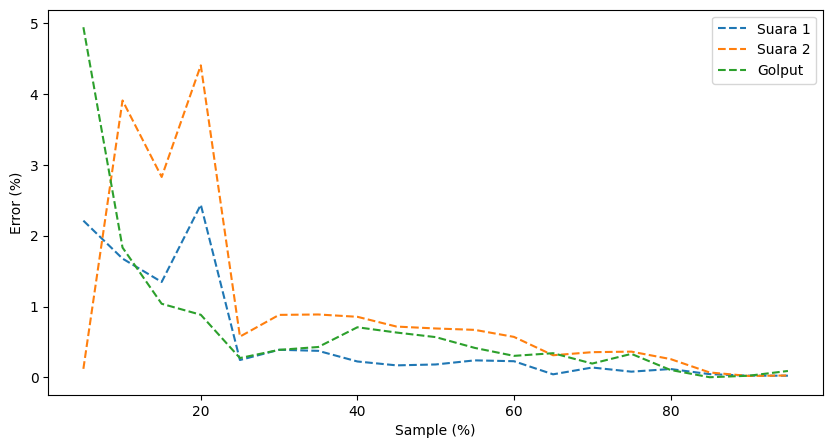

In [23]:
# Display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara1"] = error_suara1
estimation_parameter_data["error_suara2"] = error_suara2
estimation_parameter_data["error_golput"] = error_golput

# Graph error
plt.figure(figsize=(10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara1"], label="Suara 1", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara2"], label="Suara 2", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# Menggabungkan data 

In [24]:
# collect all data suara and remove total row from every data
tps = pd.concat([tps_barito_selatan, tps_barito_timur, tps_barito_utara, tps_gunung_mas, tps_kapuas, tps_katingan,
                 tps_kota_palangkaraya, tps_kotawaringin_barat, tps_kotawaringin_timur, tps_lamandau, tps_murung_raya, tps_pulang_pisau,
                tps_seruyan, tps_sukamara])
tps = tps[tps["kelurahan"] != "TOTAL"]
tps = tps.rename(columns={'kelurahan': 'Kelurahan'})

total_row = pd.DataFrame([{
    "Provinsi": "TOTAL",
    "Kabupaten_Kota": len(data["Kabupaten_Kota"].unique()),
    "Kecamatan": len(data["Kecamatan"].unique()),
    "Kelurahan": len(tps["Kelurahan"].unique()),
    "nomor_tps": len(tps["Kelurahan"].unique()) * len(tps["nomor_tps"].unique()),
    "suara1": tps["suara1"].sum(),
    "suara2": tps["suara2"].sum(),
    "golput": tps["golput"].sum()
}])

# concat data suara with data 
completed_data = pd.merge(data, tps, on ="Kelurahan", how="outer")
completed_data = pd.concat([completed_data, total_row], ignore_index=True)
completed_data
completed_data.to_excel("D:/PENS/Semester 3/Analisa Statistika Terapan/completed_data.xlsx", index=False)

# Estimasi parameter dengan Cluster Random Sampling

In [25]:
# Make cluster sampling from completed_data
cluster_sampling = completed_data.groupby(["Kabupaten_Kota", "Kecamatan", "Kelurahan"]).apply(lambda x: x.sample(frac=.1, replace=False))
cluster_sampling = cluster_sampling.reset_index(drop=True)
cluster_sampling

,Provinsi,Kabupaten_Kota,Kecamatan,Kelurahan,nomor_tps,suara1,suara2,golput
0,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Mangkatir,5,129,17,10
1,Kalimantan Tengah,Barito Selatan,Dusun Hilir,Teluk Timbau,1,336,37,20
2,Kalimantan Tengah,Barito Selatan,Dusun Selatan,Baru,1,291,106,194
3,Kalimantan Tengah,Barito Selatan,Dusun Selatan,Buntok Kota,5,121,95,28
4,Kalimantan Tengah,Barito Selatan,Dusun Selatan,Danau Sadar,1,80,81,62
...,...,...,...,...,...,...,...,...
645,Kalimantan Tengah,Sukamara,Sukamara,Mendawai,1,76,103,33
646,Kalimantan Tengah,Sukamara,Sukamara,Mendawai,3,485,86,11
647,Kalimantan Tengah,Sukamara,Sukamara,Padang,6,26,44,42
648,Kalimantan Tengah,Sukamara,Sukamara,Petarikan,2,3,29,6


In [26]:
# Estimasi parameter dengan cluster randon sampling
estimasi_parameter_data = []
estimasi_suara1 = []
estimasi_suara2 = []
estimasi_golput = []

for i in range(1, 20):
    cluster_sampling = completed_data.groupby(["Kabupaten_Kota", "Kecamatan", "Kelurahan"]).apply(lambda x: x.sample(frac=i/20, replace=False))

  # Sum all suara_1, suara_2, and golput
    suara1 = cluster_sampling["suara1"].sum()
    suara2 = cluster_sampling["suara2"].sum()
    golput = cluster_sampling["golput"].sum()
    
    # Append to list
    estimasi_suara1.append(suara1)
    estimasi_suara2.append(suara2)
    estimasi_golput.append(golput)
    
    # Calculate percentage of suara_1, suara_2, and golput
    percentage_suara1 = (suara1 / (suara1 + suara2 + golput)) * 100
    percentage_suara2 = (suara2 / (suara1 + suara2 + golput)) * 100
    percentage_golput = (golput / (suara1 + suara2 + golput)) * 100
    
    
    estimasi_parameter_data.append({
        "Sample (%)": int(i/20 * 100),
        "suara1": percentage_suara1,
        "suara2": percentage_suara2,
        "golput": percentage_golput,
    })


# Make estimation parameter data to dataframe
estimasi_parameter_data = pd.DataFrame(estimasi_parameter_data)

print("Estimasi Proporsi Parameter".center(40, "="))
estimasi_parameter_data

======Estimasi Proporsi Parameter=======


,Sample (%),suara1,suara2,golput
0,5,48.506094,30.039909,21.453996
1,10,48.084786,29.846093,22.069121
2,15,46.825082,31.659573,21.515345
3,20,47.338498,31.022953,21.638550
4,25,46.915196,30.688365,22.396439
5,30,48.684812,30.459443,20.855745
6,35,47.161514,30.669940,22.168546
7,40,47.763297,30.423415,21.813288
8,45,47.007422,31.202723,21.789855
9,50,47.480601,30.907824,21.611575


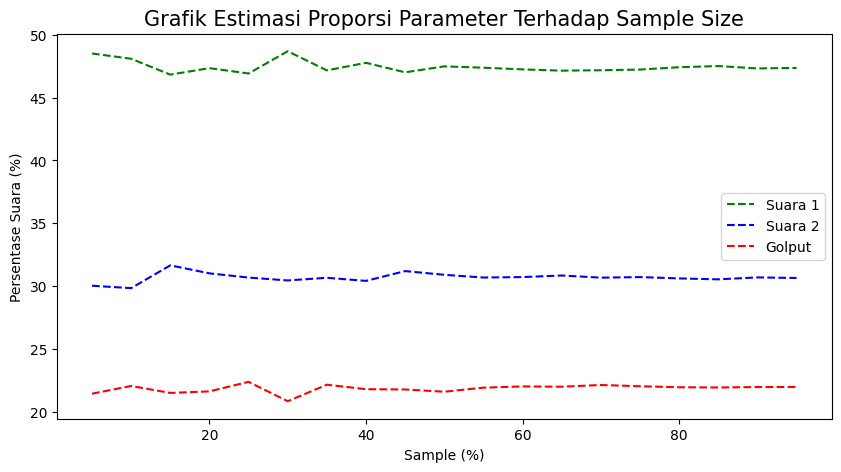

In [27]:
# Grafik estimasi parameter terhqdap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimasi_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimasi_parameter_data["suara1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimasi_parameter_data["suara2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimasi_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Persentase Suara (%)")
plt.legend()
plt.show()

In [28]:
# Hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara1 = (completed_data["suara1"].sum() / (completed_data["suara1"].sum() + completed_data["suara2"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara2 = (completed_data["suara2"].sum() / (completed_data["suara1"].sum() + completed_data["suara2"].sum() + completed_data["golput"].sum())) * 100
percentage_golput = (completed_data["golput"].sum() / (completed_data["suara1"].sum() + completed_data["suara2"].sum() + completed_data["golput"].sum())) * 100

x = estimation_parameter_data["Sample (%)"]
error_suara1 = abs(100*(estimation_parameter_data["suara1"]-percentage_suara1)/percentage_suara1)
error_suara2 = abs(100*(estimation_parameter_data["suara2"]-percentage_suara2)/percentage_suara2)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput)/percentage_golput)

data_error = pd.DataFrame({
    "Sample (%)": x,
    "Error Suara 1": error_suara1,
    "Error Suara 2": error_suara2,
    "Error Golput": error_golput
})

print("Error Estimasi Proporsi Parameter".center(50, "="))
data_error

========Error Estimasi Proporsi Parameter=========


,Sample (%),Error Suara 1,Error Suara 2,Error Golput
0,5,2.291150,0.066525,5.027619
1,10,1.600838,3.851202,1.921614
2,15,1.270475,2.772415,1.129054
3,20,2.361638,4.346706,0.973811
4,25,0.168592,0.521304,0.363713
5,30,0.313165,0.827398,0.479098
6,35,0.298083,0.833120,0.519562
7,40,0.147757,0.800401,0.797726
8,45,0.093033,0.662669,0.723561
9,50,0.105575,0.635763,0.659031


<Figure size 1000x500 with 0 Axes>

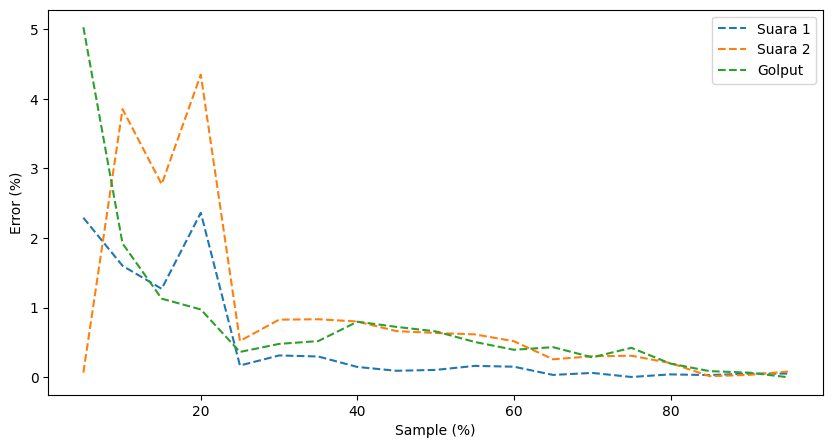

In [29]:
# Display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimasi_parameter_data["Sample (%)"]

estimasi_parameter_data["error_suara1"] = error_suara1
estimasi_parameter_data["error_suara2"] = error_suara2
estimasi_parameter_data["error_golput"] = error_golput

# Graph error
plt.figure(figsize=(10, 5))
plt.plot(x, estimasi_parameter_data["error_suara1"], label="Suara 1", linestyle="dashed")
plt.plot(x, estimasi_parameter_data["error_suara2"], label="Suara 2", linestyle="dashed")
plt.plot(x, estimasi_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# Estimasi Parameter dengan Multistage Random Sampling

In [30]:
# Get 3 random kecamatan from each kabupaten_kota as make it to list, except for KEP SERIBU, take all kecamatan in that city
completed_data = completed_data[completed_data["Provinsi"] != "TOTAL"]

# Get random kelurahan from completed_data as make it to list
kelurahan_list = np.random.choice(completed_data["Kelurahan"].unique(), 50, replace=False)

# Take only 3 random tps from each kelurahan as dataframe from completed_data
tps = []
for kel in kelurahan_list:
    tps.append(completed_data[completed_data["Kelurahan"] == kel].sample(n=3, replace=False))

# concat all tps to one dataframe
cluster_sampling = pd.concat(tps).reset_index(drop=True)
cluster_sampling

,Provinsi,Kabupaten_Kota,Kecamatan,Kelurahan,nomor_tps,suara1,suara2,golput
0,Kalimantan Tengah,Gunung Mas,Kahayan Hulu Utara,Tumbang Takaoi,4,9,2,19
1,Kalimantan Tengah,Gunung Mas,Kahayan Hulu Utara,Tumbang Takaoi,2,40,5,21
2,Kalimantan Tengah,Gunung Mas,Kahayan Hulu Utara,Tumbang Takaoi,3,123,2,42
3,Kalimantan Tengah,Kotawaringin Timur,Mentaya Hulu,Pantap,5,136,54,79
4,Kalimantan Tengah,Kotawaringin Timur,Mentaya Hulu,Pantap,4,6,38,62
...,...,...,...,...,...,...,...,...
145,Kalimantan Tengah,Kotawaringin Timur,Mentaya Hilir Selatan,Samuda Besar,1,39,117,18
146,Kalimantan Tengah,Kotawaringin Timur,Mentaya Hilir Selatan,Samuda Besar,3,276,51,20
147,Kalimantan Tengah,Gunung Mas,Mihing Raya,Rangan Tate,1,136,35,27
148,Kalimantan Tengah,Gunung Mas,Mihing Raya,Rangan Tate,4,14,6,6


In [31]:
# Estimasi parameter dengan multistage random sampling
estimasi_parameter_data = []
estimasi_suara1 = []
estimasi_suara2 = []
estimasi_golput = []

for i in range(1, 20):  
    multistage_sampling = completed_data.sample(frac=i/20, random_state=42).reset_index(drop=True)
    
    # Sum all suara_1, suara_2, and golput
    suara1 = multistage_sampling["suara1"].sum()
    suara2 = multistage_sampling["suara2"].sum()
    golput = multistage_sampling["golput"].sum()

    # Append to list
    estimasi_suara1.append(suara1)
    estimasi_suara2.append(suara2)
    estimasi_golput.append(golput)

    # Calculate percentage of suara_1, suara_2, and golput
    percentage_suara1 = (suara1 / (suara1 + suara2 + golput)) * 100
    percentage_suara2 = (suara2 / (suara1 + suara2 + golput)) * 100
    percentage_golput = (golput / (suara1 + suara2 + golput)) * 100

    estimasi_parameter_data.append({
        "Sample (%)": int(i/20 * 100),
        "suara1": percentage_suara1,
        "suara2": percentage_suara2,
        "golput": percentage_golput,
    })

# Make estimation parameter data to dataframe
estimasi_parameter_data = pd.DataFrame(estimasi_parameter_data)

print("Estimasi Proporsi Parameter".center(40, "="))
estimasi_parameter_data

======Estimasi Proporsi Parameter=======


,Sample (%),suara1,suara2,golput
0,5,52.060874,28.339548,19.599579
1,10,51.105883,28.967808,19.926308
2,15,49.624567,29.911574,20.463859
3,20,49.005549,30.243030,20.751421
4,25,48.239994,31.004915,20.755092
5,30,48.436503,30.580938,20.982559
6,35,47.971584,30.504715,21.523701
7,40,47.915965,30.487893,21.596142
8,45,47.537287,30.786737,21.675976
9,50,47.596682,30.920612,21.482706


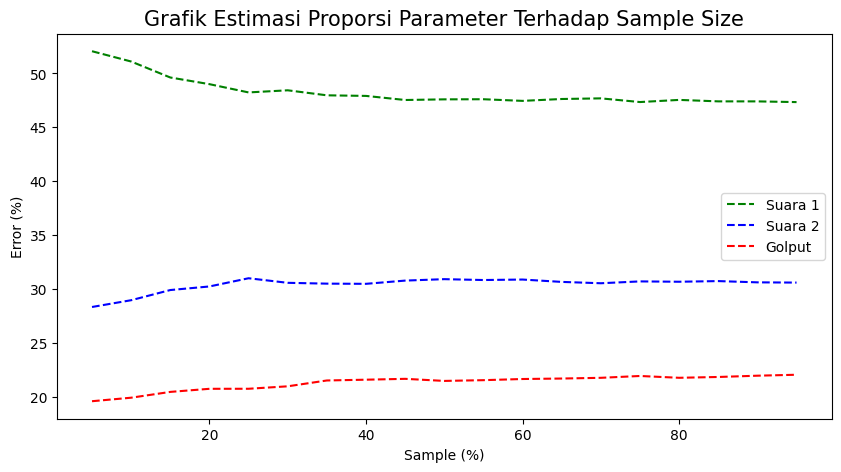

In [32]:
# Grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimasi_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimasi_parameter_data["suara1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimasi_parameter_data["suara2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimasi_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [33]:
# Hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara1 = (completed_data["suara1"].sum() / (completed_data["suara1"].sum() + completed_data["suara2"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara2 = (completed_data["suara2"].sum() / (completed_data["suara1"].sum() + completed_data["suara2"].sum() + completed_data["golput"].sum())) * 100
percentage_golput = (completed_data["golput"].sum() / (completed_data["suara1"].sum() + completed_data["suara2"].sum() + completed_data["golput"].sum())) * 100

x = estimation_parameter_data["Sample (%)"]
error_suara1 = abs(100*(estimasi_parameter_data["suara1"]-percentage_suara1)/percentage_suara1)
error_suara2 = abs(100*(estimasi_parameter_data["suara2"]-percentage_suara2)/percentage_suara2)
error_golput = abs(100*(estimasi_parameter_data["golput"]-percentage_golput)/percentage_golput)

data_error = pd.DataFrame({
    "Sample (%)": x,
    "Error Suara 1": error_suara1,
    "Error Suara 2": error_suara2,
    "Error Golput": error_golput
})

print("Error Estimasi Proporsi Parameter".center(50, "="))
data_error

========Error Estimasi Proporsi Parameter=========


,Sample (%),Error Suara 1,Error Suara 2,Error Golput
0,5,10.014079,7.607681,10.930981
1,10,7.996010,5.559431,9.446178
2,15,4.865720,2.482576,7.003313
3,20,3.557622,1.401966,5.696506
4,25,1.939865,1.081922,5.679826
5,30,2.355125,0.300322,4.646115
6,35,1.372667,0.548822,2.186933
7,40,1.255134,0.603667,1.857727
8,45,0.454919,0.370623,1.494929
9,50,0.580431,0.807081,2.373232


<Figure size 1000x500 with 0 Axes>

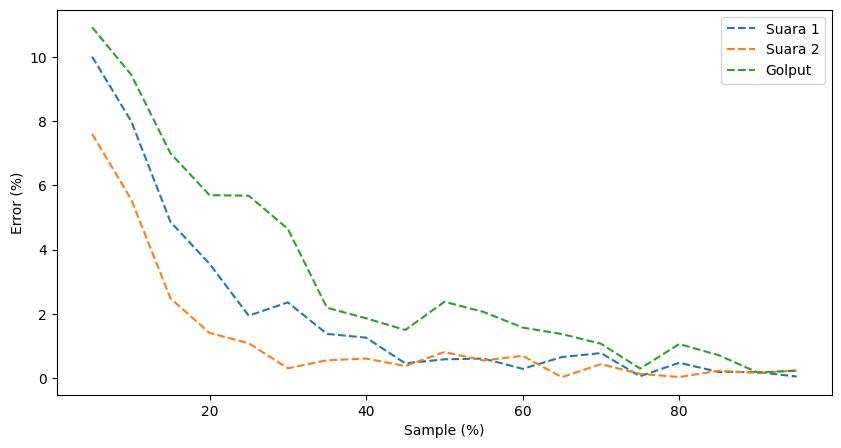

In [34]:
# Display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimasi_parameter_data["Sample (%)"]

estimasi_parameter_data["error_suara1"] = error_suara1
estimasi_parameter_data["error_suara2"] = error_suara2
estimasi_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize=(10, 5))
plt.plot(estimasi_parameter_data["Sample (%)"], estimasi_parameter_data["error_suara1"], label="Suara 1", linestyle="dashed")
plt.plot(estimasi_parameter_data["Sample (%)"], estimasi_parameter_data["error_suara2"], label="Suara 2", linestyle="dashed")
plt.plot(estimasi_parameter_data["Sample (%)"], estimasi_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()